In [1]:
#import nbpresent
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from bokeh.palettes import Category10
from bokeh.plotting import *
from bokeh.models import *

In [2]:
# run : conda install nltk

# Data cleaning and overall plot of activity

In [3]:
def get_date_time(x):
    """
    From string to datatime.date()
    input: 
        x    : str
    output:
        date : datetime - Only month/day/year
        time : datetime - Only hour/minutes/
    """
    date_time = dt.datetime.strptime(x, '%m/%d/%Y %H:%M')
    #print(date_time)
    date = date_time.replace(minute=0, hour=0, second=0)
    #print(date)
    time = date_time.hour
    #type(time)
    
    return date


def cleaning_plot(df,dataset):
    """
    Cleans and selecting relevant tweets.
    input:
        df      - pd.DataFrame: Containing one of the IRA datasets
        dataset - int         : The IRA dataset ID
    output:
        df_tmp  - pd.DataFrame: Cleaned IRA dataset
    """
    RELEVANT_COL = ['author', 'publish_date', 'account_category', 'content', 'following', 'followers', 'retweet']
    
    #We will only select tweets in english. This represents 77% of the datasets.
    df_tmp = df[df.language == 'English'].drop(columns={'harvested_date', 'language'})
    df_tmp = df_tmp[RELEVANT_COL]

    #Keeping only right troll and left troll tweets. (57% datasets)
    df_tmp = df_tmp[(df_tmp.account_category == 'RightTroll') | (df_tmp.account_category == 'LeftTroll')  ]

    #date 
    df_tmp['publish_date'] = df_tmp.publish_date.apply(lambda x: get_date_time(x))
    df_tmp = df_tmp[df_tmp.publish_date > dt.datetime(2014,10,1,0,0,0)] #selecting after Oct 2014

    df_tmp['dataset'] = dataset #from which dataset it comes

    return df_tmp

In [4]:
DATA_FOLDER = 'Data/'
TWEET_DATA = 'russian-troll-tweets/IRAhandle_tweets_'
APPROVAL_DATA = 'approval_polllist.csv'
CAMPAIGN_POLLS = 'presidential_polls.csv'

tweet_data = pd.DataFrame()

# The dataset is composed of 9 sub_datasets
for dataset in range(1,9):
    df_tmp = cleaning_plot(pd.read_csv(DATA_FOLDER + TWEET_DATA + str(dataset) + '.csv'), dataset)
    tweet_data = tweet_data.append(df_tmp, ignore_index=True)

In [ ]:
tweet_data.head(15)

,author,publish_date,account_category,content,following,followers,retweet,dataset
0,10_GOP,2017-10-01,RightTroll,"""We have a sitting Democrat US Senator on tria...",1052,9636,0,1
1,10_GOP,2017-10-01,RightTroll,Marshawn Lynch arrives to game in anti-Trump s...,1054,9637,0,1
2,10_GOP,2017-10-01,RightTroll,Daughter of fallen Navy Sailor delivers powerf...,1054,9637,1,1
3,10_GOP,2017-10-01,RightTroll,JUST IN: President Trump dedicates Presidents ...,1062,9642,0,1
4,10_GOP,2017-10-01,RightTroll,"19,000 RESPECTING our National Anthem! #StandF...",1050,9645,1,1
5,10_GOP,2017-10-01,RightTroll,"Dan Bongino: ""Nobody trolls liberals better th...",1050,9644,0,1
6,10_GOP,2017-10-01,RightTroll,🐝🐝🐝 https://t.co/MorL3AQW0z,1050,9644,1,1
7,10_GOP,2017-10-01,RightTroll,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,1050,9644,0,1
8,10_GOP,2017-10-01,RightTroll,"As much as I hate promoting CNN article, here ...",1050,9646,0,1
9,10_GOP,2017-10-01,RightTroll,After the 'genocide' remark from San Juan Mayo...,1050,9646,0,1


## Exploratory Data Analysis.


In [ ]:
tweet_data.describe()

,following,followers,retweet,dataset
count,1.120419e+06,1.120419e+06,1.120419e+06,1.120419e+06
mean,3.134401e+03,3.945025e+03,5.711060e-01,3.840561e+00
std,7.229547e+03,1.142280e+04,4.949183e-01,2.254963e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.310000e+02,4.670000e+02,0.000000e+00,2.000000e+00
50%,1.066000e+03,9.050000e+02,1.000000e+00,4.000000e+00
75%,2.862000e+03,2.150000e+03,1.000000e+00,5.000000e+00
max,7.621000e+04,1.452440e+05,1.000000e+00,8.000000e+00


In [ ]:
#Some have a very high number of followers, let's see. 
#Carefull, number of followers evolve with time... might be intresting to see
tweet_data.loc[tweet_data.followers>10000,].groupby('author').max().sort_values('followers', ascending=False).head(10)

,publish_date,account_category,content,following,followers,retweet,dataset
author,,,,,,,
TEN_GOP,2017-08-24,RightTroll,🤔🤔🤔 https://t.co/5EUcOVaot3,76210,145244,1,8
JENN_ABRAMS,2017-08-03,RightTroll,🤔 https://t.co/v3z9w6m9Sx,26371,71022,1,4
PAMELA_MOORE13,2017-08-24,RightTroll,"🚨SMOKING GUN🚨 Loretta Lynch Stated: ""She woul...",43131,70734,1,6
ELEVEN_GOP,2017-07-27,RightTroll,🚨ALERT🚨DISGRACE‼️@Twitter #Suspends @TEN_GOP O...,30222,59100,1,3
CRYSTAL1JOHNSON,2017-08-24,LeftTroll,🚨🚨⚠️🚨🚨 #AmberAlert Indianapolis Area Help 👮...,31547,56725,1,2
WOKELUISA,2018-03-21,LeftTroll,“We are not living in ordinary times and it is...,50841,55467,1,8
SOUTHLONESTAR,2017-05-23,RightTroll,��� Female protestor interrupts Bill Clinton r...,49846,53782,1,7
USA_GUNSLINGER,2017-08-23,RightTroll,🚨Funny how ppl supposedly hate our country so ...,45406,43895,1,8
THEFOUNDINGSON,2017-10-04,RightTroll,🚨 COVER UP EXPOSED 🚨 A lil JUSTICE for Seth ...,31380,42000,1,8


In [ ]:
#Info by category
tweet_data.groupby('account_category').describe().transpose()

account_category      LeftTroll     RightTroll
dataset   count   413885.000000  706534.000000
          mean         3.946055       3.778764
          std          2.256581       2.251721
          min          1.000000       1.000000
          25%          2.000000       2.000000
          50%          4.000000       4.000000
          75%          6.000000       5.000000
          max          8.000000       8.000000
followers count   413885.000000  706534.000000
          mean      2347.825012    4880.659116
          std       5915.285543   13566.432020
          min          0.000000       0.000000
          25%        696.000000     337.000000
          50%        832.000000    1439.000000
          75%        977.000000    2378.000000
          max      56725.000000  145244.000000
following count   413885.000000  706534.000000
          mean      1912.187695    3850.369402
          std       4330.105703    8397.177257
          min          0.000000       0.000000
          25%        529.000000     545.000000
          50%        793.000000    1920.000000
          75%       1074.000000    3233.000000
          max      50841.000000   76210.000000
retweet   count   413885.000000  706534.000000
          mean         0.816797       0.427181
          std          0.386833       0.494669
          min          0.000000       0.000000
          25%          1.000000       0.000000
          50%          1.000000       0.000000
          75%          1.000000       1.000000
          max          1.000000       1.000000

### Classical Plot

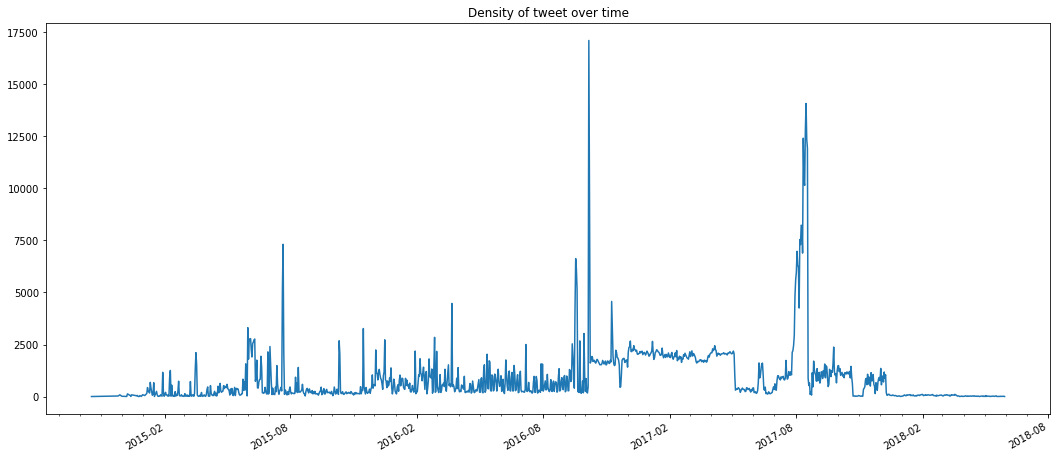

In [ ]:
 #plotting goodies
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax = tweet_data.publish_date.value_counts().sort_index().plot(figsize=(18,8),legend=False)

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Density of tweet over time')
plt.show()

In [ ]:
#df_charlotte=df[(df.publish_date>dt.datetime(2017,8,11,0,0,0)) & (df.publish_date<dt.datetime(2017,8,13,0,0,0)) & (df.account_category=='RightTroll')]

### Interactive Plots

In [ ]:
#interactive plot
p = figure(plot_width=850, plot_height=450, x_axis_type='datetime')
p.title.text = 'Tweeting activity according to Right and Left category'
p.yaxis.axis_label = 'Tweet density'

categories=tweet_data.account_category.unique()

for color, category in enumerate(categories):
    df_plot = pd.DataFrame(tweet_data[tweet_data.account_category==category].publish_date.value_counts().sort_index())
    source = ColumnDataSource(data=df_plot)
    p.line(x='index', y='publish_date', source=source,\
            line_width=2, alpha=0.8, legend=category, color=Category10[3][color])


df_plot=pd.DataFrame(tweet_data.publish_date.value_counts().sort_index())   
source = ColumnDataSource(data=df_plot)
p.line(x='index', y='publish_date', line_width=2, alpha=0.3, legend='All', color=Category10[3][-1], source=source)


p.legend.location = 'top_left'
p.legend.click_policy='hide'

hover_tool=tools.HoverTool(
    tooltips=[
        ('Date', '@index{%F}'),
        ('Number of tweets','@publish_date')],

    formatters={
        'index' : 'datetime', # use 'datetime' formatter for 'date' field
        'publish_date' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)

p.tools.append(hover_tool)

output_notebook()#\interactive_legend.html\)# title=\interactive_legend.py example\)\n

Loading BokehJS ...

Pour desactiver uenc ourbe cliquer sur la légende. Pour desactiver le curseur (qui affiche les données), cliquer, à droite, sur l'icone |=|

Vous pouvez aussi zoomer.

In [ ]:
show(p)

# Word analysis:

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
from nltk.corpus import stopwords
import math
import re
from collections import Counter
nltk.download('stopwords')   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasgandar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### In Class version

In [ ]:
'''def cleaning_content(df, dataset, right=True, left=True):
    df_tmp=df[df.language=='English'].drop(columns={'harvested_date', 'language'})
    df_tmp=df.loc[:,['publish_date','content', 'account_category']]

    #category
    if not left:
        df_tmp=df_tmp[(df_tmp.account_category=='RightTroll')]
    elif not right:
        df_tmp=df_tmp[(df_tmp.account_category=='LeftTroll')]
    else:        
        df_tmp=df_tmp[(df_tmp.account_category=='RightTroll') | (df_tmp.account_category=='LeftTroll')]

    #date 
    df_tmp['publish_date']=df_tmp.publish_date.apply(lambda x: get_date(x))
    df_tmp=df_tmp[df_tmp.publish_date > dt.datetime(2014,10,1,0,0,0)].drop(columns='publish_date') #selecting after Oct 2014

    df_tmp['dataset']=dataset #from which dataset it comes

    return df_tmp

#def wm2df(wm, feat_names):

    # create an index for each row
#    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
#    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
#                     columns=feat_names)
#    return(df)    
'''
class TweetWords(object):
    # tokenize the document
    def __init__(self,df):
        #for tokenizing
        self.link_numbers=('http', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
        self.stemmer = PorterStemmer()
        self.stop_w = stopwords.words('english')

        self.voc=pd.DataFrame()
        self.text=' '.join([ch for ch in df.content])

    def tokenize(self): #__call__
        text_raw = ''.join([ch for ch in self.text if ch not in string.punctuation])
        tokens = nltk.word_tokenize(text_raw)
        return [self.stemmer.stem(word.lower()).encode('ascii',errors='ignore').decode()\
                         for word in tokens if (not word.startswith(self.link_numbers))]

    def top_vocabulary(self, top=10):
        words = [word for word in self.tokenize() if word not in self.stop_w] 
        self.voc=self.voc.from_dict(Counter(words), orient='index')\
                .rename(columns={0:'Count'})\
                .sort_values(by='Count', ascending=False)[:top]
        return self.voc

data='data/russian-troll-tweets/IRAhandle_tweets_'

left=False
df=pd.DataFrame()
for dataset in range(1,9):
    df_tmp=cleaning_content(pd.read_csv(data+str(dataset)+'.csv'), dataset, left=left)
    df=df.append(df_tmp)

#### In *main* version

In [ ]:
link_numbers = ('http', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_w = stopwords.words('english') + ['', '&amp', 'amp','rt']

def tokenize(text): #__call__
    text_raw = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text_raw)
    
    words = [lemmatizer.lemmatize(word.lower()).encode('ascii',errors='ignore').decode()\
                     for word in tokens if (not word.startswith(link_numbers))]
    
    return [word for word in words if word not in stop_w] 


def hashtag_extractor(text):
    hashtags = []
    text = text.split()
    for words in text:
        new_hash = re.match("#[A-Za-z0-9\-\.\_]+", words)
        if new_hash:
            hashtags.append(new_hash.group(0))
    return hashtags

In [ ]:
tweet_data['hashtags'] = tweet_data.apply(lambda row: hashtag_extractor(row['content']), axis=1)
tweet_data.head()

,author,publish_date,account_category,content,following,followers,retweet,dataset,hashtags
0,10_GOP,2017-10-01,RightTroll,"""We have a sitting Democrat US Senator on tria...",1052,9636,0,1,[]
1,10_GOP,2017-10-01,RightTroll,Marshawn Lynch arrives to game in anti-Trump s...,1054,9637,0,1,[]
2,10_GOP,2017-10-01,RightTroll,Daughter of fallen Navy Sailor delivers powerf...,1054,9637,1,1,[#BoycottNFL]
3,10_GOP,2017-10-01,RightTroll,JUST IN: President Trump dedicates Presidents ...,1062,9642,0,1,[]
4,10_GOP,2017-10-01,RightTroll,"19,000 RESPECTING our National Anthem! #StandF...",1050,9645,1,1,[#StandForOurAnthem]


In [ ]:
tweet_data['clean_content'] = tweet_data.apply(lambda row: tokenize(row['content']), axis=1)
tweet_data.head()

In [ ]:
tweet_data.content[0]

In [ ]:
tweet_data.clean_content[0]